# Cluster Analysis

To load the Wholesale customers dataset into Python, using the pandas library. Here's the code to load the dataset:

In [70]:
import pandas as pd

# Specify the file path for the dataset
file_path = "wholesale_customers_data.csv"

# Load the dataset into a pandas DataFrame
wholesale_customers_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("The first 5 rows of the dataset are \n", wholesale_customers_data.head())

# Check the dimensions of the dataset, that is, number of rows and number of columns
print("\nDataset Information")
print("Number of instances  : ",wholesale_customers_data.shape[0])
print("Number of attributes : ",wholesale_customers_data.shape[1])

# Check the data types of each column on iris dataframe
print("\nData types:")
print(wholesale_customers_data.dtypes)

# Now, printing the dataset detail of iris dataframe
print("\nDataset Details :")
wholesale_customers_data.info(memory_usage = True)

# Performing statistical analysis on iris dataframe
print("\nStatistical Analysis:")
print(wholesale_customers_data.describe())

# Calculating the correlation matrix on wholesale customers dataframe
print("\nCorrelation Matrix:")
print(wholesale_customers_data.corr(numeric_only = True))


The first 5 rows of the dataset are 
    Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

Dataset Information
Number of instances  :  440
Number of attributes :  8

Data types:
Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

Dataset Details :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  -----

# Data Preprocessing

Data preprocessing is an essential step in preparing the dataset for analysis. Here's an example of how you can handle missing values and normalize the data using pandas and scikit-learn libraries

Checking for missing values using the isnull().sum() function. If there are missing values, you have two options: remove the rows with missing values using df.dropna() or fill the missing values with a suitable strategy using df.fillna().

Next, we separate the target variable (Channel) from the features. Then, we use the StandardScaler from scikit-learn to normalize the features. The fit_transform method scales the features to have zero mean and unit variance. Finally, we convert the normalized features array back to a DataFrame for further analysis.

In the given observation, we notice that the data exhibits considerable variability in terms of its magnitude. Specifically, variables such as Channel and Region have relatively lower magnitudes, while variables like Fresh, Milk, Grocery, and others have higher magnitudes.

The difference in magnitudes can pose a challenge for distance-based algorithms like K-Means. To mitigate this issue, our initial step is to normalize all the variables to a consistent magnitude.

In [116]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Check for missing values
print(wholesale_customers_data.isnull().sum())

# Handle missing values (if any)
# Option 1: Remove rows with missing values
wholesale_customers_data = wholesale_customers_data.dropna()

# Option 2: Fill missing values with mean (or any other strategy)
# df = df.fillna(df.mean())

# Separate the target variable (Channel) from the features
target = wholesale_customers_data['Channel']
features = wholesale_customers_data.drop('Channel', axis=1)

# Normalize the data using StandardScaler
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Convert the normalized features array back to a DataFrame
normalized_df = pd.DataFrame(normalized_features, columns=features.columns)

# Print the first few rows of the normalized DataFrame
print("\nThe first few rows of the normalized DataFrame:-")
print(normalized_df.head())

# Describe data frame
pd.DataFrame(normalized_features).describe()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

The first few rows of the normalized DataFrame:-
     Region     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
0  0.590668  0.052933  0.523568 -0.041115 -0.589367         -0.043569   
1  0.590668 -0.391302  0.544458  0.170318 -0.270136          0.086407   
2  0.590668 -0.447029  0.408538 -0.028157 -0.137536          0.133232   
3  0.590668  0.100111 -0.624020 -0.392977  0.687144         -0.498588   
4  0.590668  0.840239 -0.052396 -0.079356  0.173859         -0.231918   

   Delicassen  
0   -0.066339  
1    0.089151  
2    2.243293  
3    0.093411  
4    1.299347  


,0,1,2,3,4,5,6
count,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


# Find optimum value of K

Getting the value of k

In [117]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=0.0001,
               #precompute_distances='auto',
               verbose=0,
               random_state=42,
               copy_x=True,
               #n_jobs=None,
               algorithm='auto')

model.fit(normalized_df)
model.inertia_

print('SSE: ', model.inertia_)
print('\nCentroids: \n', model.cluster_centers_)

pred = model.predict(normalized_df)
features['cluster'] = pred
print('\nCount in each cluster: \n', features['cluster'].value_counts())

C:\Users\jasme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\jasme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


SSE:  1437.7777730404587

Centroids: 
 [[-1.53086452 -0.17901152 -0.2575104  -0.26531569 -0.06313779 -0.2723679
  -0.13162808]
 [ 0.37151486  1.68131155 -0.11170481 -0.24410067  1.15405088 -0.39420489
   0.35277784]
 [-0.17814562 -0.26086015  1.99920893  2.37190452 -0.23495033  2.49396554
   0.33174095]
 [ 0.59066829  1.96681731  5.17550306  1.28721685  6.90059988 -0.55486198
  16.47844745]
 [ 0.59066829 -0.30447578 -0.19180033 -0.19715928 -0.24913853 -0.1683745
  -0.15003776]]

Count in each cluster: 
 4    240
0    103
1     59
2     37
3      1
Name: cluster, dtype: int64


We can see that 4th cluster has maximum number of samples, while 5th cluster has minimum number of samples.

# Elbow method
Let's see how we can find optimum number of clusters. We will use elbow method.

C:\Users\jasme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\jasme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jasme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\jasme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jasme\anaconda3\lib\site-packages\s

Text(0, 0.5, 'Inertia or SSE')

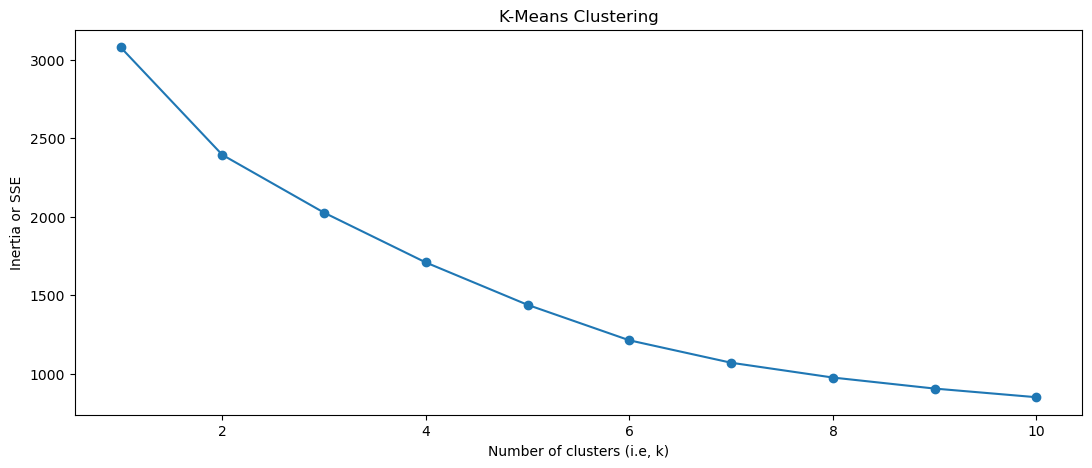

In [125]:
import numpy as np
from sklearn.cluster import KMeans

clusters = range(1, 11)
sse=[]

for cluster in clusters:
    model = KMeans(n_clusters=cluster,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=0.0001,
               #precompute_distances='auto',
               verbose=0,
               random_state=42,
               copy_x=True,
               #n_jobs=None,
               algorithm='auto')

    model.fit(normalized_df)
    sse.append(model.inertia_)

sse_df = pd.DataFrame(np.column_stack((clusters, sse)), columns=['cluster', 'SSE'])
fig, ax = plt.subplots(figsize=(13, 5))
ax.plot(sse_df['cluster'], sse_df['SSE'], marker='o')
plt.title('K-Means Clustering')
ax.set_xlabel('Number of clusters (i.e, k)')
ax.set_ylabel('Inertia or SSE')

We will choose K=5 and fit the model.

0      4
1      4
2      4
3      4
4      1
      ..
435    1
436    1
437    2
438    4
439    4
Name: Cluster, Length: 440, dtype: int32


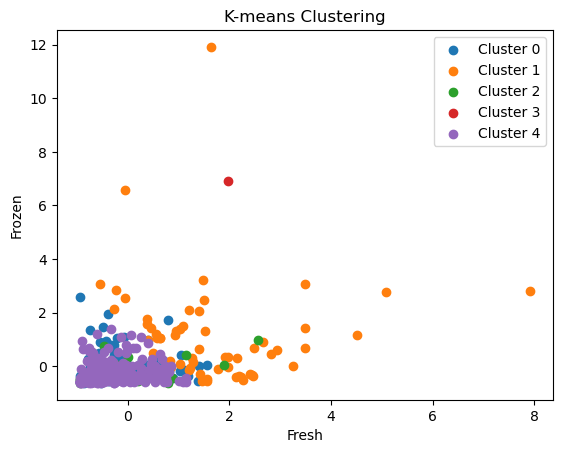

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Add the cluster labels as a new column in the DataFrame
normalized_df['Cluster'] = cluster_labels

print(normalized_df['Cluster'])

# Create scatter plots to visualize the clusters
for cluster in range(num_clusters):
    cluster_data = normalized_df[normalized_df['Cluster'] == cluster]
    plt.scatter(cluster_data['Fresh'], cluster_data['Frozen'], label=f'Cluster {cluster}')

plt.xlabel("Fresh")
plt.ylabel("Frozen")
plt.title("K-means Clustering")
plt.legend()
plt.show()


# WCSS

Evaluate the quality of the clustering results using appropriate metrics, such as the silhouette 
coefficient or within-cluster sum of squares (WCSS)

In [133]:
from sklearn.metrics import silhouette_score

# Apply K-means clustering with the chosen number of clusters
num_clusters = 5  # Replace with your chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(normalized_df)

# Calculate the within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_

# Print the Within-Cluster Sum of Squares (WCSS)
print("Within-Cluster Sum of Squares (WCSS):", wcss)

# Print the Silhouette coefficient
print("K-means Silhouette Score:", silhouette_score(normalized_df, kmeans_labels))


C:\Users\jasme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jasme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Within-Cluster Sum of Squares (WCSS): 1437.7777730404587
K-means Silhouette Score: 0.5316443194095958


 # Interpret and analyze the clustering results. 
 Discuss the characteristics and purchasing patterns 
of each cluster and provide insights into customer segmentation.

In [134]:

# Analyze the characteristics and purchasing patterns of each cluster
cluster_analysis = normalized_df.groupby('Cluster').mean()

# Print the cluster analysis
print(cluster_analysis)


           Region     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Cluster                                                                       
0       -1.530865 -0.179012 -0.257510 -0.265316 -0.063138         -0.272368   
1        0.371515  1.681312 -0.111705 -0.244101  1.154051         -0.394205   
2       -0.178146 -0.260860  1.999209  2.371905 -0.234950          2.493966   
3        0.590668  1.966817  5.175503  1.287217  6.900600         -0.554862   
4        0.590668 -0.304476 -0.191800 -0.197159 -0.249139         -0.168375   

         Delicassen  
Cluster              
0         -0.131628  
1          0.352778  
2          0.331741  
3         16.478447  
4         -0.150038  


 # Algorithms  
 Experiment with different clustering algorithms (e.g., hierarchical clustering, DBSCAN) and 
compare their performance and results with the K-means algorithm

C:\Users\jasme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jasme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


K-means Silhouette Score: 0.5339282867926768
Agglomerative Clustering Silhouette Score: 0.5341472562361951
DBSCAN Silhouette Score: -0.14553050364997408


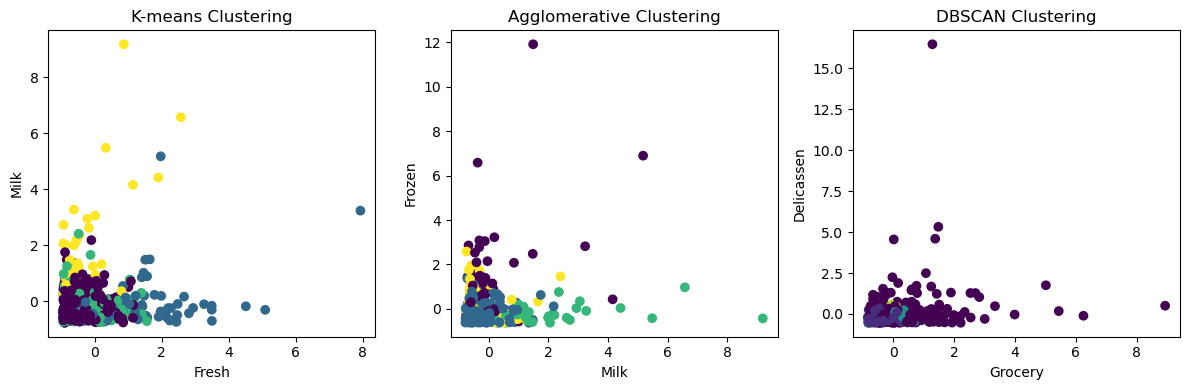

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score


# Choose the number of clusters for K-means and Agglomerative Clustering
num_clusters = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(normalized_df)
kmeans_silhouette = silhouette_score(normalized_df, kmeans_labels)

# Perform Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
agglomerative_labels = agglomerative.fit_predict(normalized_df)
agglomerative_silhouette = silhouette_score(normalized_df, agglomerative_labels)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(normalized_df)
dbscan_silhouette = silhouette_score(normalized_df, dbscan_labels)

# Print the Silhouette scores for each clustering algorithm
print("K-means Silhouette Score:", kmeans_silhouette)
print("Agglomerative Clustering Silhouette Score:", agglomerative_silhouette)
print("DBSCAN Silhouette Score:", dbscan_silhouette)

# Plot the clusters for each algorithm
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(normalized_df['Fresh'], normalized_df['Milk'], c = kmeans_labels)
plt.title("K-means Clustering")
plt.xlabel("Fresh")
plt.ylabel("Milk")

plt.subplot(1, 3, 2)
plt.scatter(normalized_df['Milk'], normalized_df['Frozen'], c = agglomerative_labels)
plt.title("Agglomerative Clustering")
plt.xlabel("Milk")
plt.ylabel("Frozen")

plt.subplot(1, 3, 3)
plt.scatter(normalized_df['Grocery'], normalized_df['Delicassen'], c = dbscan_labels)
plt.title("DBSCAN Clustering")
plt.xlabel("Grocery")
plt.ylabel("Delicassen")

plt.tight_layout()
plt.show()


C:\Users\jasme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jasme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


K-means Silhouette Score: 0.5316443194095958
Agglomerative Clustering Silhouette Score: 0.5328690780589613
DBSCAN Silhouette Score: -0.14553050364997408


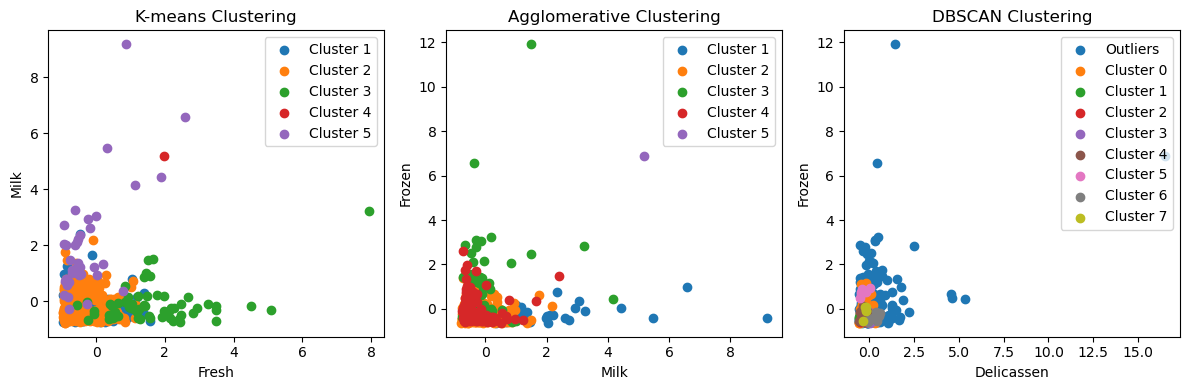

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# Choose the number of clusters for K-means and Agglomerative Clustering
num_clusters = 5

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(normalized_df)
kmeans_silhouette = silhouette_score(normalized_df, kmeans_labels)

# Perform Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
agglomerative_labels = agglomerative.fit_predict(normalized_df)
agglomerative_silhouette = silhouette_score(normalized_df, agglomerative_labels)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(normalized_df)
dbscan_silhouette = silhouette_score(normalized_df, dbscan_labels)

# Print the Silhouette scores for each clustering algorithm
print("K-means Silhouette Score:", kmeans_silhouette)
print("Agglomerative Clustering Silhouette Score:", agglomerative_silhouette)
print("DBSCAN Silhouette Score:", dbscan_silhouette)

# Plot the clusters for each algorithm
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
for cluster in range(num_clusters):
    plt.scatter(normalized_df['Fresh'][kmeans_labels == cluster], normalized_df['Milk'][kmeans_labels == cluster], label=f'Cluster {cluster+1}')
plt.title("K-means Clustering")
plt.xlabel("Fresh")
plt.ylabel("Milk")
plt.legend(loc='upper right')

plt.subplot(1, 3, 2)
for cluster in range(num_clusters):
    plt.scatter(normalized_df['Milk'][agglomerative_labels == cluster], normalized_df['Frozen'][agglomerative_labels == cluster], label=f'Cluster {cluster+1}')
plt.title("Agglomerative Clustering")
plt.xlabel("Milk")
plt.ylabel("Frozen")
plt.legend(loc='upper right')

plt.subplot(1, 3, 3)
unique_labels = np.unique(dbscan_labels)
for cluster in unique_labels:
    if cluster == -1:
        plt.scatter(normalized_df['Delicassen'][dbscan_labels == cluster], normalized_df['Frozen'][dbscan_labels == cluster], label='Outliers')
    else:
        plt.scatter(normalized_df['Delicassen'][dbscan_labels == cluster], normalized_df['Frozen'][dbscan_labels == cluster], label=f'Cluster {cluster}')
plt.title("DBSCAN Clustering")
plt.xlabel("Delicassen")
plt.ylabel("Frozen")
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
